# Lab 2b: Logistic Regression for  Multi Class Classification
Solution by Sushant Gautam (Roll 20)

## Tasks for students:

1. Logistic Regression for multi-class classification
2. Plot logistic regression cost function

## Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
import math

## Synthetic dataset

Let's create a synthetic binary class dataset using  [scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) and plot it.

[]

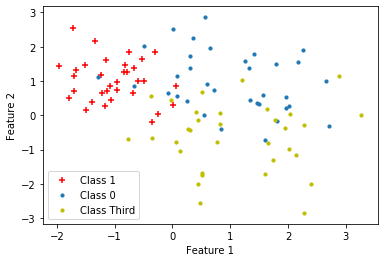

In [2]:

def one_hot(a, num_classes):
    return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

n_of_class = 3

n_samples = 100
X, y = make_classification(n_samples, n_features=n_of_class, n_informative=n_of_class, n_repeated=0,
                           n_redundant=0 ,random_state=1,  n_classes=n_of_class, n_clusters_per_class=1)
y_org = y.reshape(n_samples,1)
y=one_hot(y_org,n_of_class )


# Plot
pos , neg, third = (y_org==1) , (y_org==0), (y_org==2)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.scatter(X[third[:,0],0],X[third[:,0],1],c="y", marker=".",s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Class 1","Class 0", "Class Third"],loc=0)
plt.plot()

## Logistic regression classifier

Let's now create a logistic regression classifier. We will follow the following steps.

1. Softmax function
2. Compute the cost function and the gradient
3. Gradient descent
4. Plot the cost function
5. Prediction
6. Compute accuracy

### 1. Softmax function

In [3]:
def softmax(x):
    e = np.exp(x - np.max(x)) 
    if e.ndim == 1:
        return e / (np.sum(e, axis=0))
    return e / (np.array([np.sum(e, axis=1)]).T)  # ndim = 2

### 2. Compute the cost function and the gradient

For multi-class logistic regression:
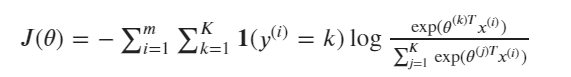

In [12]:
def multi_logistic_cost(theta, X, y):
    z= softmax(np.dot(X,theta))
    cost = - np.mean(    np.sum(  y * np.log(z) + (1 - y) * np.log(1 - z)    , axis=1)   )
    grad =  np.dot(X.T, z-y) 
    return cost, grad

### 3. Gradient descent

In [5]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """ 
    Takes in X, y, initial theta and update thetas by taking num_iters gradient steps
    with learning rate of alpha 
    """
    cost_bucket = []
    for i in range(num_iters):
        cost, grad = multi_logistic_cost(theta, X, y)
        theta -=  alpha*grad
        cost_bucket.append(cost)
    return theta, cost_bucket

### Initialize values, preprocess and compute $\theta$

In [6]:
if not 'init' in locals():  
    m , n = X.shape
    alpha = 0.01
    num_iters = 2000

    # Add ones for the intercept term and add it to X
    X0 = np.ones((m,1))
    X = np.hstack((X0,X)) 
    theta = np.ones((n+1,n_of_class)) 
init=1

theta, cost_bucket = gradientDescent(X,y,theta,alpha,num_iters)
print(" Optimized theta found by the gradient descent", theta)
print("The cost associated with the initial theta",cost_bucket[0])
# cost_bucket

 Optimized theta found by the gradient descent [[ 2.66687223 -2.90025274  3.2333805 ]
 [ 2.25313604 -1.43086119  2.17772515]
 [-0.3319304   4.72916149 -1.39723109]
 [ 3.82659352 -2.70622937  1.87963585]]
The cost associated with the initial theta 109.86122886681096


### 4. Plot the cost function

Text(0.5, 1.0, 'Cost Function')

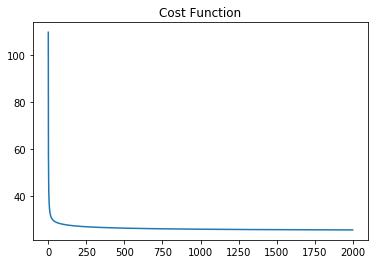

In [7]:
plt.plot(range(len(cost_bucket)), cost_bucket)
plt.title('Cost Function')

### 5. Prediction

In [8]:
def logistic_classifier(theta,X):
    """ Takes in theta and X and predicts the class label with the confidence value"""
    return  softmax(X.dot(theta))

In [9]:
x_test = np.array([1]* n_of_class)
x_test = np.hstack((np.ones(1),x_test))
prob = logistic_classifier(theta,x_test)
print("The probability of the sample belonging to the",np.argmax(prob)," class is: ",prob.max())

The probability of the sample belonging to the 0  class is:  0.9255931538277737


### 6. Compute accuracy

In [10]:
prob = logistic_classifier(theta,X)
print("Training Accuracy is: ", n_samples  - np.count_nonzero(np.subtract([np.argmax(e) for e in prob], [e.argmax() for e in y])),"%")

Training Accuracy is:  90 %


[]

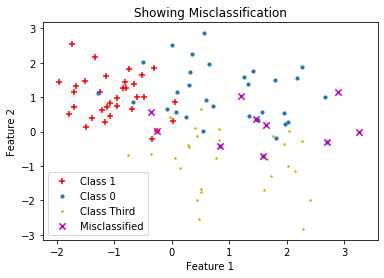

In [11]:
# Plot
pos , neg, third = (y_org==1) , (y_org==0), (y_org==2)
plt.scatter(X[:, (1,2)][pos[:,0],0],X[:, (1,2)][pos[:,0],1],c="r",marker="+")
plt.scatter(X[:, (1,2)][neg[:,0],0],X[:, (1,2)][neg[:,0],1],marker="o",s=10)
plt.scatter(X[:, (1,2)][third[:,0],0],X[:, (1,2)][third[:,0],1],c="y", marker=".",s=10)
plt.scatter(X[:, (1,2)][(np.subtract([np.argmax(e) for e in prob], [e.argmax() for e in y]))!= 0,0],X[:, (1,2)][(np.subtract([np.argmax(e) for e in prob], [e.argmax() for e in y]))!= 0,1],c="m", marker="x",s=40)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Class 1","Class 0", "Class Third", "Misclassified"],loc=0)
plt.title('Showing Misclassification')
plt.plot()